<a href="https://colab.research.google.com/github/jumafernandez/dsI/blob/main/SFS_Feature_selection_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏥 Clasificación de Cáncer de Mama con Selección de Características (SFS)

En este notebook, utilizaremos el dataset `load_breast_cancer()` de `sklearn.datasets` para entrenar modelos de **Árbol de Decisión** y **Regresión Logística**, aplicando **Selección de Características** con `SequentialFeatureSelector (SFS)`.

---


## 📌 1. Carga de Datos y Exploración del Dataset
El dataset contiene información sobre tumores de mama y la tarea es clasificar si un tumor es **maligno (1)** o **benigno (0)**.


In [ ]:
# 📚 Importación de librerías
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 📥 Cargar el dataset
data = load_breast_cancer()

# 📊 Convertir a DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 🔍 Ver las primeras filas
X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 🏆 2. Selección de Características con SFS

Usaremos **`SequentialFeatureSelector (SFS)`** para seleccionar las mejores variables.

---

**Explicación del método:**
- **Paso 1:** Comenzamos con un conjunto vacío de variables.
- **Paso 2:** Agregamos iterativamente las características que maximizan la precisión.
- **Paso 3:** Eliminamos aquellas que dejan de ser relevantes (`floating=True`).
- **Paso 4:** Obtenemos el mejor subconjunto de características.
---
Aplicaremos **SFS** con un **Árbol de Decisión**.


In [ ]:
# 📚 Importar SFS y Árbol de Decisión
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 🔀 Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 🌲 Definir el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)

In [ ]:
# 🔎 Aplicar Selección de Características (SFS)
sfs = SFS(tree_model,
          k_features="best",  # Encuentra la mejor cantidad de variables
          forward=True,  # Selección hacia adelante
          floating=True,  # Puede eliminar variables no útiles
          scoring='accuracy',
          cv=5)  # Validación cruzada

# 🔬 Ajustar SFS
sfs.fit(X_train, y_train)

# 🎯 Obtener las mejores características
selected_features = list(sfs.k_feature_names_)
print("🔹 Variables seleccionadas:", selected_features)

🔹 Variables seleccionadas: ['mean radius', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'radius error', 'perimeter error', 'area error', 'smoothness error', 'concavity error', 'concave points error', 'fractal dimension error', 'worst area', 'worst smoothness', 'worst compactness', 'worst concave points', 'worst fractal dimension']


In [ ]:
# 🔄 Filtrar datos con las mejores características
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]

## 🌳 3. Entrenamiento del Árbol de Clasificación

Entrenaremos un **Árbol de Decisión** utilizando solo las características seleccionadas por **SFS**.

---

**Pasos:**
1. Entrenar el modelo con las mejores características.
2. Evaluar la precisión en el conjunto de prueba.


In [ ]:
# 📌 Entrenar el Árbol con las variables seleccionadas
tree_model.fit(X_train_sfs, y_train)

# 🔍 Predicción en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test_sfs)

# 🎯 Calcular precisión del modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"🌲 Precisión del Árbol de Decisión: {accuracy_tree:.4f}")

🌲 Precisión del Árbol de Decisión: 0.9298


## 🤖 4. Entrenamiento de una Regresión Logística con SFS

Ahora repetiremos el proceso con una **Regresión Logística**:

---

**¿Por qué usar Regresión Logística?**
- Es un modelo de clasificación lineal.
- Interpretable y eficiente en datos pequeños.
- Funciona bien en problemas de clasificación binaria.

---

Aplicaremos **SFS** para seleccionar características antes del entrenamiento.


In [ ]:
# 📚 Importar Regresión Logística
from sklearn.linear_model import LogisticRegression

# 🤖 Definir el modelo de Regresión Logística
log_model = LogisticRegression(max_iter=500)

En este caso, es aconsejable escalar los datos:

In [ ]:
# 📚 Importar StandardScaler
from sklearn.preprocessing import StandardScaler

# 🔄 Escalar los datos antes de aplicar SFS
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame (para que SFS reconozca las columnas)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# 🔎 Aplicar SFS para la Regresión Logística
sfs_log = SFS(log_model,
              k_features="best",
              forward=True,
              floating=True,
              scoring='accuracy',
              cv=5)

# 🔬 Ajustar SFS
sfs_log.fit(X_train_scaled, y_train)

# 🎯 Obtener las mejores características
selected_features_log = list(sfs_log.k_feature_names_)
print("🔹 Variables seleccionadas (Regresión Logística):", selected_features_log)

🔹 Variables seleccionadas (Regresión Logística): ['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean fractal dimension', 'radius error', 'texture error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity']


In [ ]:
# 🔄 Filtrar datos con las mejores características
X_train_sfs_log = X_train_scaled[selected_features_log]
X_test_sfs_log = X_test_scaled[selected_features_log]

## 📊 5. Entrenamiento de la Regresión Logística

Ahora entrenaremos la **Regresión Logística** con las variables seleccionadas por **SFS**.

---

**Pasos:**
1. Entrenar el modelo.
2. Evaluar la precisión en el conjunto de prueba.


In [ ]:
# 📌 Entrenar el modelo con las variables seleccionadas
log_model.fit(X_train_sfs_log, y_train)

# 🔍 Predicción en el conjunto de prueba
y_pred_log = log_model.predict(X_test_sfs_log)

# 🎯 Calcular precisión del modelo
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"🤖 Precisión de la Regresión Logística: {accuracy_log:.4f}")


🤖 Precisión de la Regresión Logística: 0.9737


## 📈 6. Comparación de Resultados
Finalmente, comparamos la precisión obtenida con ambos modelos:


In [ ]:
# 📊 Mostrar resultados
print(f"🌲 Precisión Árbol de Decisión: {accuracy_tree:.4f}")
print(f"🤖 Precisión Regresión Logística: {accuracy_log:.4f}")


🌲 Precisión Árbol de Decisión: 0.9298
🤖 Precisión Regresión Logística: 0.9737


# 🧠 7. Interpretación de los Modelos
---
Ahora interpretaremos los modelos entrenados:
- 🌲 **Visualización del Árbol de Decisión**: Para entender cómo se toman las decisiones.
- 📊 **Coeficientes de la Regresión Logística**: Para analizar la importancia de cada variable en la clasificación.
---


## 🌲 7.1 Interpretación del Árbol de Decisión
Los Árboles de Decisión dividen los datos en función de **umbrales en las características**.

📌 **¿Cómo interpretamos el árbol?**
- Cada **nodo** representa una decisión basada en una característica.
- Si la condición del nodo es **verdadera**, se va a la izquierda; si es **falsa**, a la derecha.
- Las **hojas** finales muestran la **clase predicha**.

---
A continuación, visualizaremos el árbol de decisión entrenado.


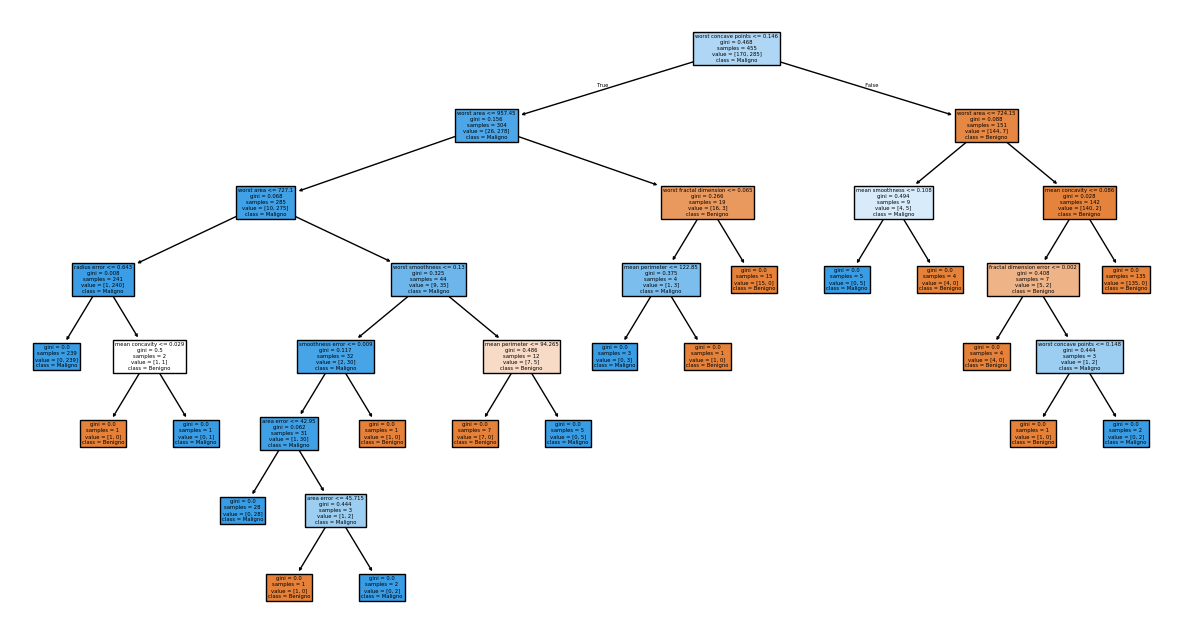

In [ ]:
# 📚 Importar librerías para visualizar el árbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 📌 Visualizar el Árbol de Decisión
plt.figure(figsize=(15, 8))
plot_tree(tree_model, feature_names=selected_features, class_names=["Benigno", "Maligno"], filled=True)
plt.show()


## 📊 7.2 Interpretación de la Regresión Logística
La Regresión Logística **estima la probabilidad de pertenecer a una clase** en función de las características.

📌 **¿Cómo interpretamos los coeficientes?**
- Cada coeficiente representa el **impacto de la variable** en la probabilidad de que el tumor sea **maligno**.
- **Coeficientes positivos** → Aumentan la probabilidad de malignidad.
- **Coeficientes negativos** → Disminuyen la probabilidad de malignidad.

---
Ahora imprimiremos los coeficientes de la regresión logística y analizaremos su impacto.


📊 Coeficientes de la Regresión Logística:
                        Coeficiente
compactness error          1.125997
texture error              0.398337
concavity error            0.218528
mean fractal dimension     0.094499
mean compactness          -0.333935
mean radius               -0.450430
mean area                 -0.454891
mean perimeter            -0.489477
symmetry error            -0.521810
concave points error      -0.740474
area error                -0.800927
worst smoothness          -1.065460
radius error              -1.137530
worst area                -1.142096
worst perimeter           -1.268138
worst radius              -1.305914
worst texture             -1.499695
worst concavity           -1.719662


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


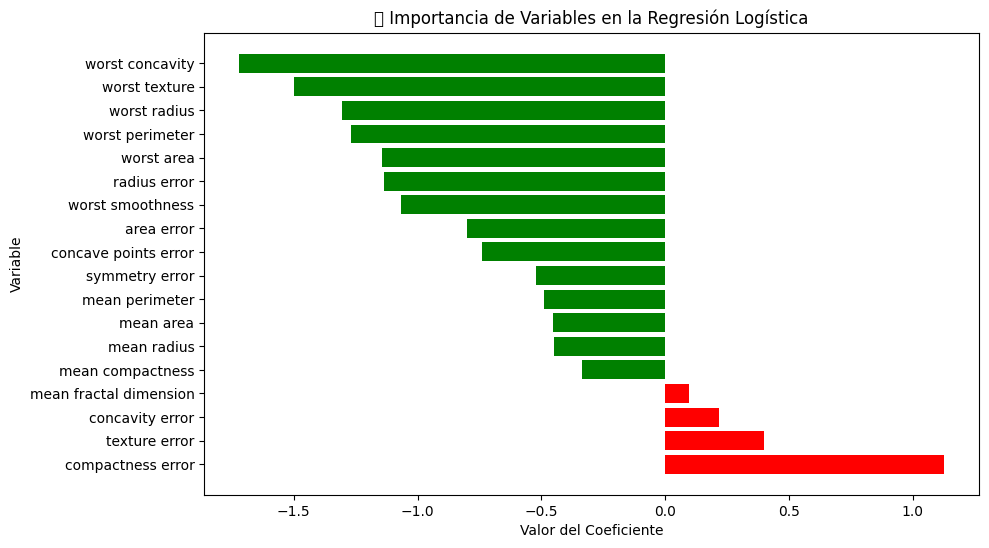

In [ ]:
# 📌 Obtener los coeficientes de la regresión logística
coef_dict = {feature: coef for feature, coef in zip(selected_features_log, log_model.coef_[0])}

# 📊 Mostrar coeficientes ordenados por importancia
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index', columns=['Coeficiente'])
coef_df = coef_df.sort_values(by="Coeficiente", ascending=False)
print("📊 Coeficientes de la Regresión Logística:")
print(coef_df)

# 📈 Graficar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coeficiente'], color=['green' if x < 0 else 'red' for x in coef_df['Coeficiente']])
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Variable")
plt.title("📊 Importancia de Variables en la Regresión Logística")
plt.show()


## 🚀 Conclusión
🎯 **Árbol de Decisión**: Nos permite ver gráficamente las reglas de clasificación.  
📊 **Regresión Logística**: Nos dice qué variables influyen más en la clasificación.

---
✅ **Si el coeficiente de una variable en la regresión logística es positivo**, significa que **aumenta la probabilidad de que el tumor sea maligno**.  
✅ **Si es negativo**, significa que **disminuye la probabilidad de malignidad**.